<a href="https://colab.research.google.com/github/Geobalies2019/Geo_Modeling/blob/main/Transport%20Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

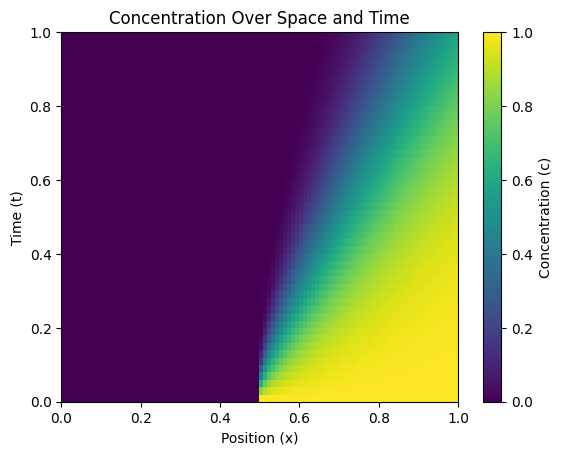

In [19]:
import numpy as np
from scipy.special import erfc

# Parameters
T = 1.0         # Maximum time
L = 1.0         # Maximum length
v = 1.0         # Velocity
D = 0.1         # Diffusivity / Dispersivity
c0 = 0.0        # Initial value
cin = 1.0       # Inflow value
M = 50          # Number of timesteps
N = 50          # Number of nodes

# Discretization
dt = T / M      # Time step
dx = L / N      # Spatial step

# Initialize vectors and arrays
e = np.ones(N)                  # ones-line-vector
t = np.linspace(dt, T, M)       # time discretization
x = np.linspace(0, L, N)        # space discretization
c = np.outer(c0 * e, np.ones(M))  # initial distribution (2D array)

# Time-stepping loop
for i in range(M):
    h = 1 / (2 * np.sqrt(D * t[i]))
    new_row = c0 + (cin - c0) * 0.5 * (erfc(h * (x - e * v * t[i])) + np.exp((v / D) * x) * erfc(h * (x + e * v * t[i])))
    c = np.vstack((c, new_row))

# Now, 'c' contains the concentration field over time and space.
import matplotlib.pyplot as plt

# Plot the transposed concentration field c'
plt.imshow(c.T, origin='lower', extent=[0, L, 0, T], aspect='auto', cmap='viridis')
plt.colorbar(label='Concentration (c)')
plt.xlabel('Position (x)')
plt.ylabel('Time (t)')
plt.title('Concentration Over Space and Time')
plt.show()


<ipython-input-20-0fb0b594257c>:26: RuntimeWarning: divide by zero encountered in double_scalars
  h = 1 / (2 * np.sqrt(D * t[i]))
<ipython-input-20-0fb0b594257c>:27: RuntimeWarning: invalid value encountered in multiply
  new_c = c0 + (cin - c0) * 0.5 * (erfc(h * (x - e * v * t[i])) + np.exp((v / D) * x) * erfc(h * (x + e * v * t[i])))


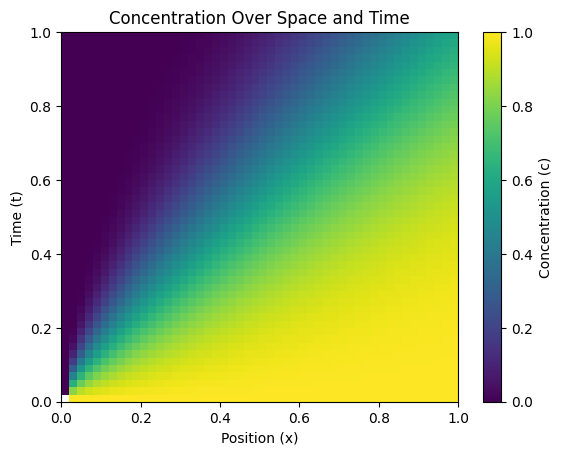

In [20]:
import numpy as np
from scipy.special import erfc

# Parameters and auxiliary variables
T = 1.0         # Maximum time
L = 1.0         # Maximum length
v = 1.0         # Velocity
D = 0.1         # Diffusivity / Dispersivity
c0 = 0.0        # Initial value
cin = 1.0       # Inflow value
M = 50          # Number of timesteps
N = 50          # Number of nodes

# Discretization
dt = T / M      # Time step
dx = L / N      # Spatial step

# Initialize auxiliary variables
e = np.ones(N)                  # ones-line-vector
t = np.linspace(0, T, M)        # time discretization
x = np.linspace(0, L, N)        # space discretization
c = c0 * e                      # initial distribution

# Calculate concentration for different time values
for i in range(len(t)):
    h = 1 / (2 * np.sqrt(D * t[i]))
    new_c = c0 + (cin - c0) * 0.5 * (erfc(h * (x - e * v * t[i])) + np.exp((v / D) * x) * erfc(h * (x + e * v * t[i])))
    c = np.vstack((c, new_c))

# Remove the initial distribution row (c0 * e)
c = c[1:]

# Now, 'c' contains the concentration field over time and space.
import matplotlib.pyplot as plt

# Plot the transposed concentration field c'
plt.imshow(c.T, origin='lower', extent=[0, L, 0, T], aspect='auto', cmap='viridis')
plt.colorbar(label='Concentration (c)')
plt.xlabel('Position (x)')
plt.ylabel('Time (t)')
plt.title('Concentration Over Space and Time')
plt.show()


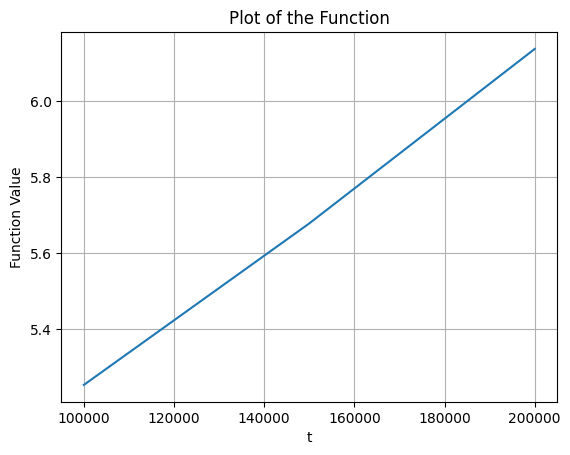

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc

# Parameters
t = np.arange(1e5, 2.05e5, 5e4)
D = 1e-6

# Calculate the function
result = 5 + 10 * erfc(1 / (2 * np.sqrt(D * t)))

# Plotting
plt.plot(t, result)
plt.xlabel('t')
plt.ylabel('Function Value')
plt.title('Plot of the Function')
plt.grid(True)
plt.show()


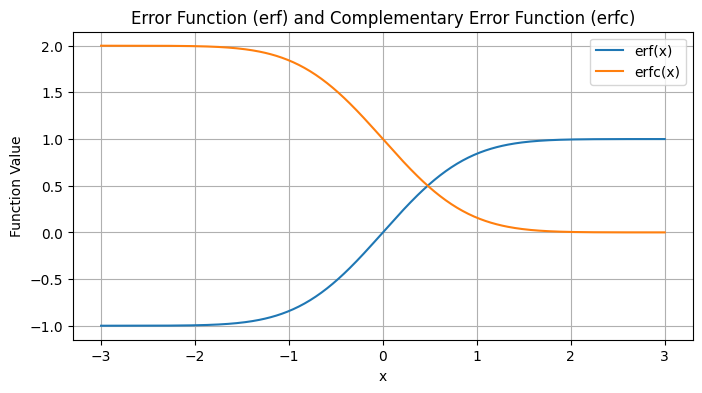

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erf, erfc

# Create a range of x values
x = np.linspace(-3, 3, 400)

# Calculate erf and erfc values for the range of x
erf_values = erf(x)
erfc_values = erfc(x)

# Create a plot
plt.figure(figsize=(8, 4))
plt.plot(x, erf_values, label='erf(x)')
plt.plot(x, erfc_values, label='erfc(x)')

# Add labels and a legend
plt.xlabel('x')
plt.ylabel('Function Value')
plt.title('Error Function (erf) and Complementary Error Function (erfc)')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

